<a href="https://www.kaggle.com/aminizahra/kmeans-on-image-compression?scriptVersionId=88420005" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **K-means on images**

# Import Lib

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load Image

In [2]:
image=cv2.imread('../input/bird-img/bird.tiff')

In [3]:
print("shape of Image:",image.shape)

shape of Image: (538, 538, 3)


# K-means

In [4]:
def kmeans(image,k,iteration): # expects img in rgb
#     img=image.copy()
    M = image.shape[0]
    N = image.shape[1]
    sum_dis=0
    channel = image.shape[2]
    original_img=image.copy()
    clusters=np.random.randint(0,255,size=(k,3))
    print('initialize clusters:\n','***', clusters, '***')
    for it in range(iteration):
        img=image.copy()
        for i in range(M):
            for j in range(N):
                x=img[i][j]
                distance=np.sqrt(np.sum((clusters-x)**2,axis=1))
                sum_dis+=distance**2
                channel=np.argmin(distance)
                img[i][j]=clusters[channel]
        loss=0
        L=[]
        for i in range(k):
            y,X,channel=np.where(img==clusters[i])
            k_points=original_img[y,X]
            L.append(np.sum(clusters[i]-k_points))
            clusters[i]=np.mean(k_points,axis=0)
        loss=sum(L)    
        print('\nCluster centroids at iteration-{}'.format(it+1),"\n", clusters)
        print('\nloss at iteration-{}:'.format(it+1),loss)
    return img,sum_dis

In [5]:
clusters,dis=kmeans(image,16,5)

initialize clusters:
 *** [[179  76 126]
 [ 17  69 114]
 [238  98 105]
 [ 39  18 156]
 [ 36 101 171]
 [104  68 228]
 [ 63 180 132]
 [ 55 185 250]
 [145 105 226]
 [227  30 179]
 [ 11 233 165]
 [254   2 146]
 [ 23 188 133]
 [ 52 166  44]
 [218  93   8]
 [140 153 108]] ***


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)



Cluster centroids at iteration-1 
 [[                 147                   86                   81]
 [                  35                   40                   44]
 [                 233                  170                  136]
 [                  58                   54                  137]
 [                  60                  116                  163]
 [                  75                  114                  226]
 [                  92                  152                  173]
 [                 116                  191                  229]
 [                 177                  200                  226]
 [-9223372036854775808 -9223372036854775808 -9223372036854775808]
 [-9223372036854775808 -9223372036854775808 -9223372036854775808]
 [-9223372036854775808 -9223372036854775808 -9223372036854775808]
 [                  22                  163                  193]
 [                  88                   88                   57]
 [                 147                  

In [6]:
sum_d = []
list_k = [2,16,64,100,256]
for k in list_k:
    img,sum_dis = kmeans(image,k,5)
    sum_d.append(sum_dis)
#------------------------------------
sum_t=[]
sumd=0
for i in range(5):
    for j in sum_d[i]:
        sumd+=j
    sum_t.append(sumd)

initialize clusters:
 *** [[153  49  60]
 [130 175 171]] ***

Cluster centroids at iteration-1 
 [[ 41  43  46]
 [128 171 200]]

loss at iteration-1: 35953674

Cluster centroids at iteration-2 
 [[ 39  45  50]
 [132 174 202]]

loss at iteration-2: -7364370

Cluster centroids at iteration-3 
 [[ 40  46  51]
 [133 175 203]]

loss at iteration-3: -4141986

Cluster centroids at iteration-4 
 [[ 40  47  52]
 [133 175 204]]

loss at iteration-4: -2584938

Cluster centroids at iteration-5 
 [[ 40  47  52]
 [133 176 204]]

loss at iteration-5: -1901205
initialize clusters:
 *** [[ 64  68  31]
 [196  94 133]
 [ 72  50  16]
 [110 228 216]
 [207 216 212]
 [ 79 147  32]
 [ 90 126 199]
 [ 31  16 224]
 [163  79  31]
 [144 175 141]
 [202 243 173]
 [ 78  74 223]
 [148 174 108]
 [ 30 199 140]
 [203  96 146]
 [127 195 192]] ***

Cluster centroids at iteration-1 
 [[ 52  58  66]
 [185 119 105]
 [ 22  23  21]
 [126 209 241]
 [199 225 240]
 [ 92 109  94]
 [ 75 129 176]
 [ 17  62 144]
 [ 59  60  66]
 [139 1

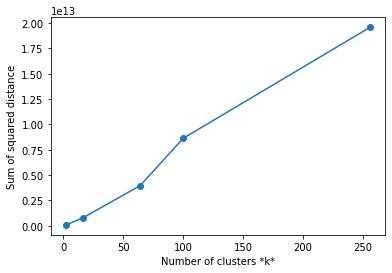

In [7]:
plt.plot(list_k, sum_t, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

# Plot Image

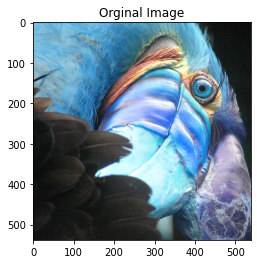

In [8]:
plt.title("Orginal Image")
plt.imshow(image,cmap=plt.cm.gray)

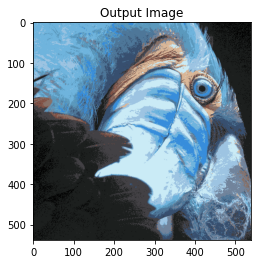

In [9]:
plt.title("Output Image")
plt.imshow(clusters,cmap=plt.cm.gray)

# Finished!